![types](imbalance.jpeg)

## Import Library

In [1]:
import numpy as np
import pandas as pd

#from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
#plt.rcParams['figure.figsize'] = [20, 7]

## load dataset

In [2]:
data = pd.read_csv('data\credit-card.csv')

In [3]:
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [4]:
data.shape
data.Class.value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [5]:
# check the number of 1s and 0s
count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 492
Not Fraudulent "0": 9000
5.466666666666667


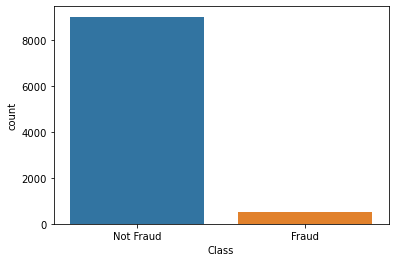

In [6]:
# plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [7]:
# check for null values
data.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

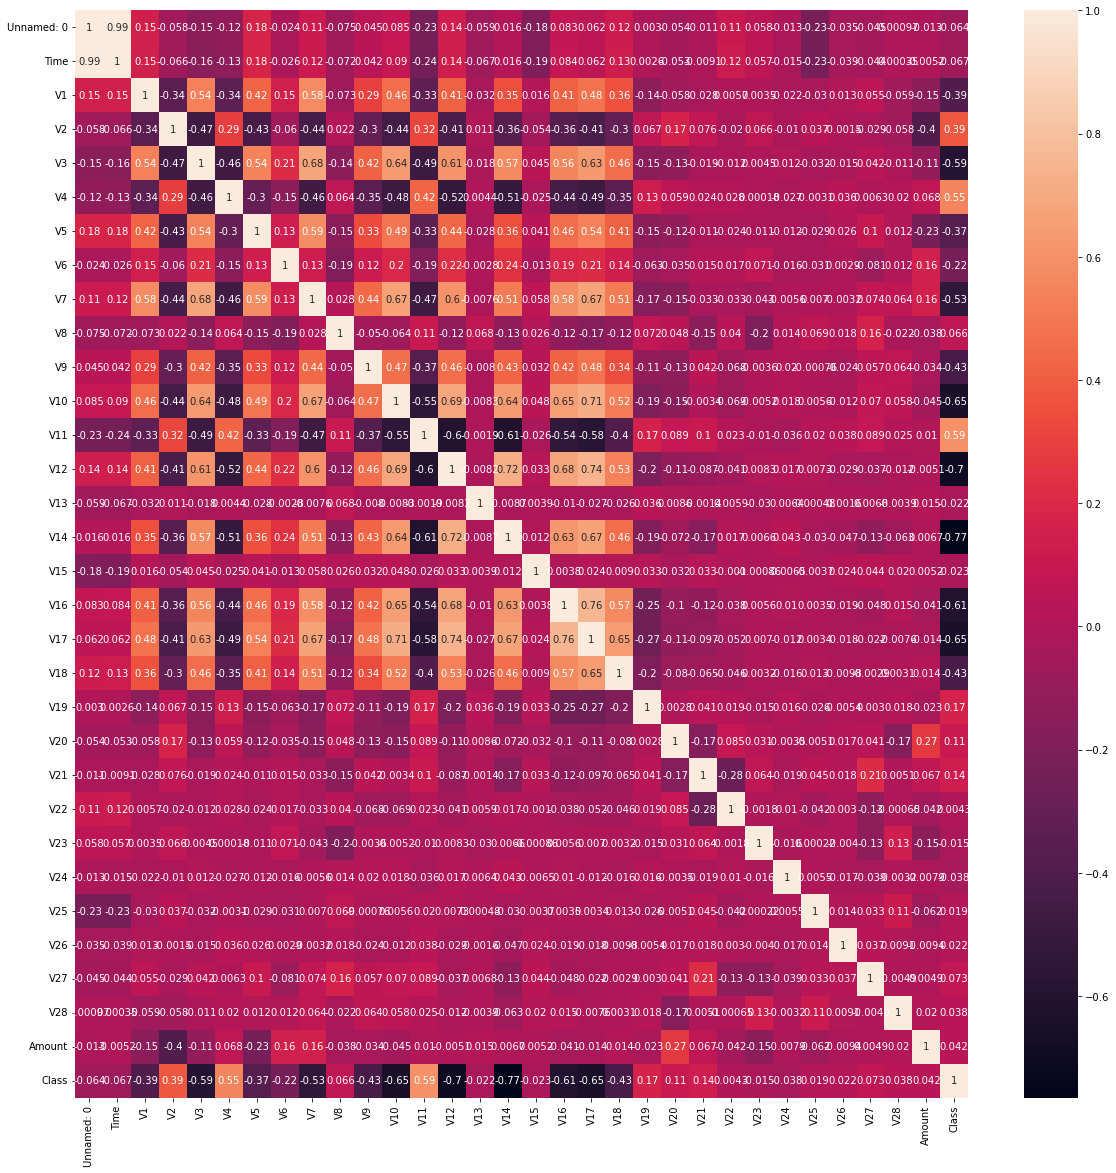

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Respose and Target variable

In [9]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(492, 9000)

## Train test split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Fit the model using Logistic Regression

In [11]:
# create the object
model =  LogisticRegression()

model.fit(x, y)

y_predict = model.predict(x)

In [12]:
accuracy_score(y_predict, y)

0.9880952380952381

In [13]:
np.unique(y_predict)

array([0, 1], dtype=int64)

## The matrix trap

In [14]:
pip install xgboost

In [15]:
# import linrary
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)
print('Roc auc scote:', roc_auc_score(xgb_y_predict, y_test))
print('F1 core:',f1_score(xgb_y_predict, y_test))

Accuracy score is: 0.9921011058451816
Roc auc scote: 0.9958677685950413
F1 core: 0.9180327868852459


In [16]:
confusion_matrix(xgb_y_predict, y_test)

array([[1800,   15],
       [   0,   84]], dtype=int64)

##  Resampling Technique

In [17]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# divie class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

In [18]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (9000, 32)

class 1: (492, 32)


## 1. Random under sampling
![types](undersample.jpg)

total class of 1 and 0:
 0    492
1    492
Name: Class, dtype: int64


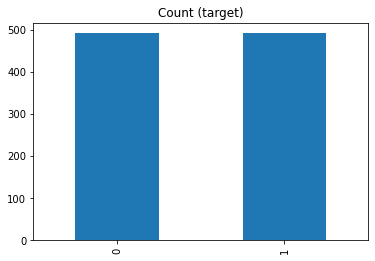

In [19]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## 2. Random over sampling
![types](oversample.jpg)

class count of 1 and 0:
 1    9000
0    9000
Name: Class, dtype: int64


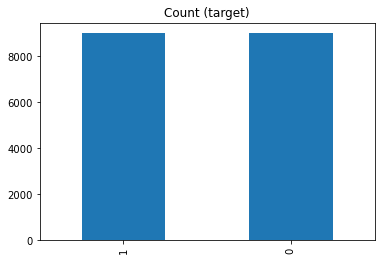

In [20]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Class'].value_counts())

# plot the count
test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Balance data with imbalance learn module

In [21]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [22]:
# import library
import imblearn

## 3. Random under-sampling with imblearn

In [23]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


## 4.Random over-sampling with imblearn

In [24]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9000, 1: 492})
Resample dataset shape Counter({1: 9000, 0: 9000})


## 5. under-sampling Tomek links
![types](tom.png)

In [25]:
# load library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_tl))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 8829, 1: 492})


## 6. Synthetic minority over-sampleing technique
![types](smote.jpg)

In [26]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(x, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 9000, 1: 492})
Resampple dataset shape: Counter({1: 9000, 0: 9000})


## 7. NearMiss
![types](nearmiss.jpg)

In [27]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 492, 1: 492})


## 8. Change the performance metric

In [28]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.9490826633683777
Accuracy score: 0.949238578680203
F1 score: 0.9473684210526315


## 9. Penalize algorithm (cost-sensitive training)

In [29]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(x_train, y_train)

svc_predict = svc_model.predict(x_test)

In [30]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.6091161616161617
Accuracy score: 0.4670879410215903
F1 score: 0.13058419243986255


## 10. Tree based algorithm

In [31]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train, y_train)

# predict
rfc_predict = rfc.predict(x_test)

In [32]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.9189141414141413
Accuracy score: 0.9910479199578726
F1 score: 0.907103825136612
